For each timespan, do multiple sequence alignment between the clades to see any differences between them all

In [8]:
import pandas as pd
import os

project_dir = os.path.join('..', '..')

In [9]:
df = pd.read_csv(os.path.join(project_dir, 'data', 'final', 'all.csv'))
df.head()

,state,p_sequence,p_accession,date,count,n_accession,n_sequence,clade,timespan
0,MA,"""MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRS...",QTP71261,2020,2,MW885877,GGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTA...,20A,1
1,WA,"""MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRS...",QLJ57227,2020,1367,MT252714,CTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGT...,19B,1
2,WA,"""MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRS...",QLJ57383,2020,1,MT252753,CCCTTHAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTT...,19A,1
3,CA,"""MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRS...",QHW06059,2020-01-29,2,MT027064,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,19A,1
4,WA,"""MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRS...",QKS89879,2020-02-29,26,MT627216,TAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATC...,19B,1


In ../../data/ClustalW_Files I have created fasta files for each timespan, and for each clade chose the one with the highest count to be included in the file.

The fasta files headers include the p_acession number, for lookup in the ncbi database
and the clade label which is figured out by using nextclade

From there, we can create individual aln files for each timespan by either downloadig [clustalw](http://www.clustal.org/omega/#Download) or by running it on [EMBL-EBI](https://www.ebi.ac.uk/Tools/msa/clustalo/).

Here is how the webpage should look after uploading the file to it


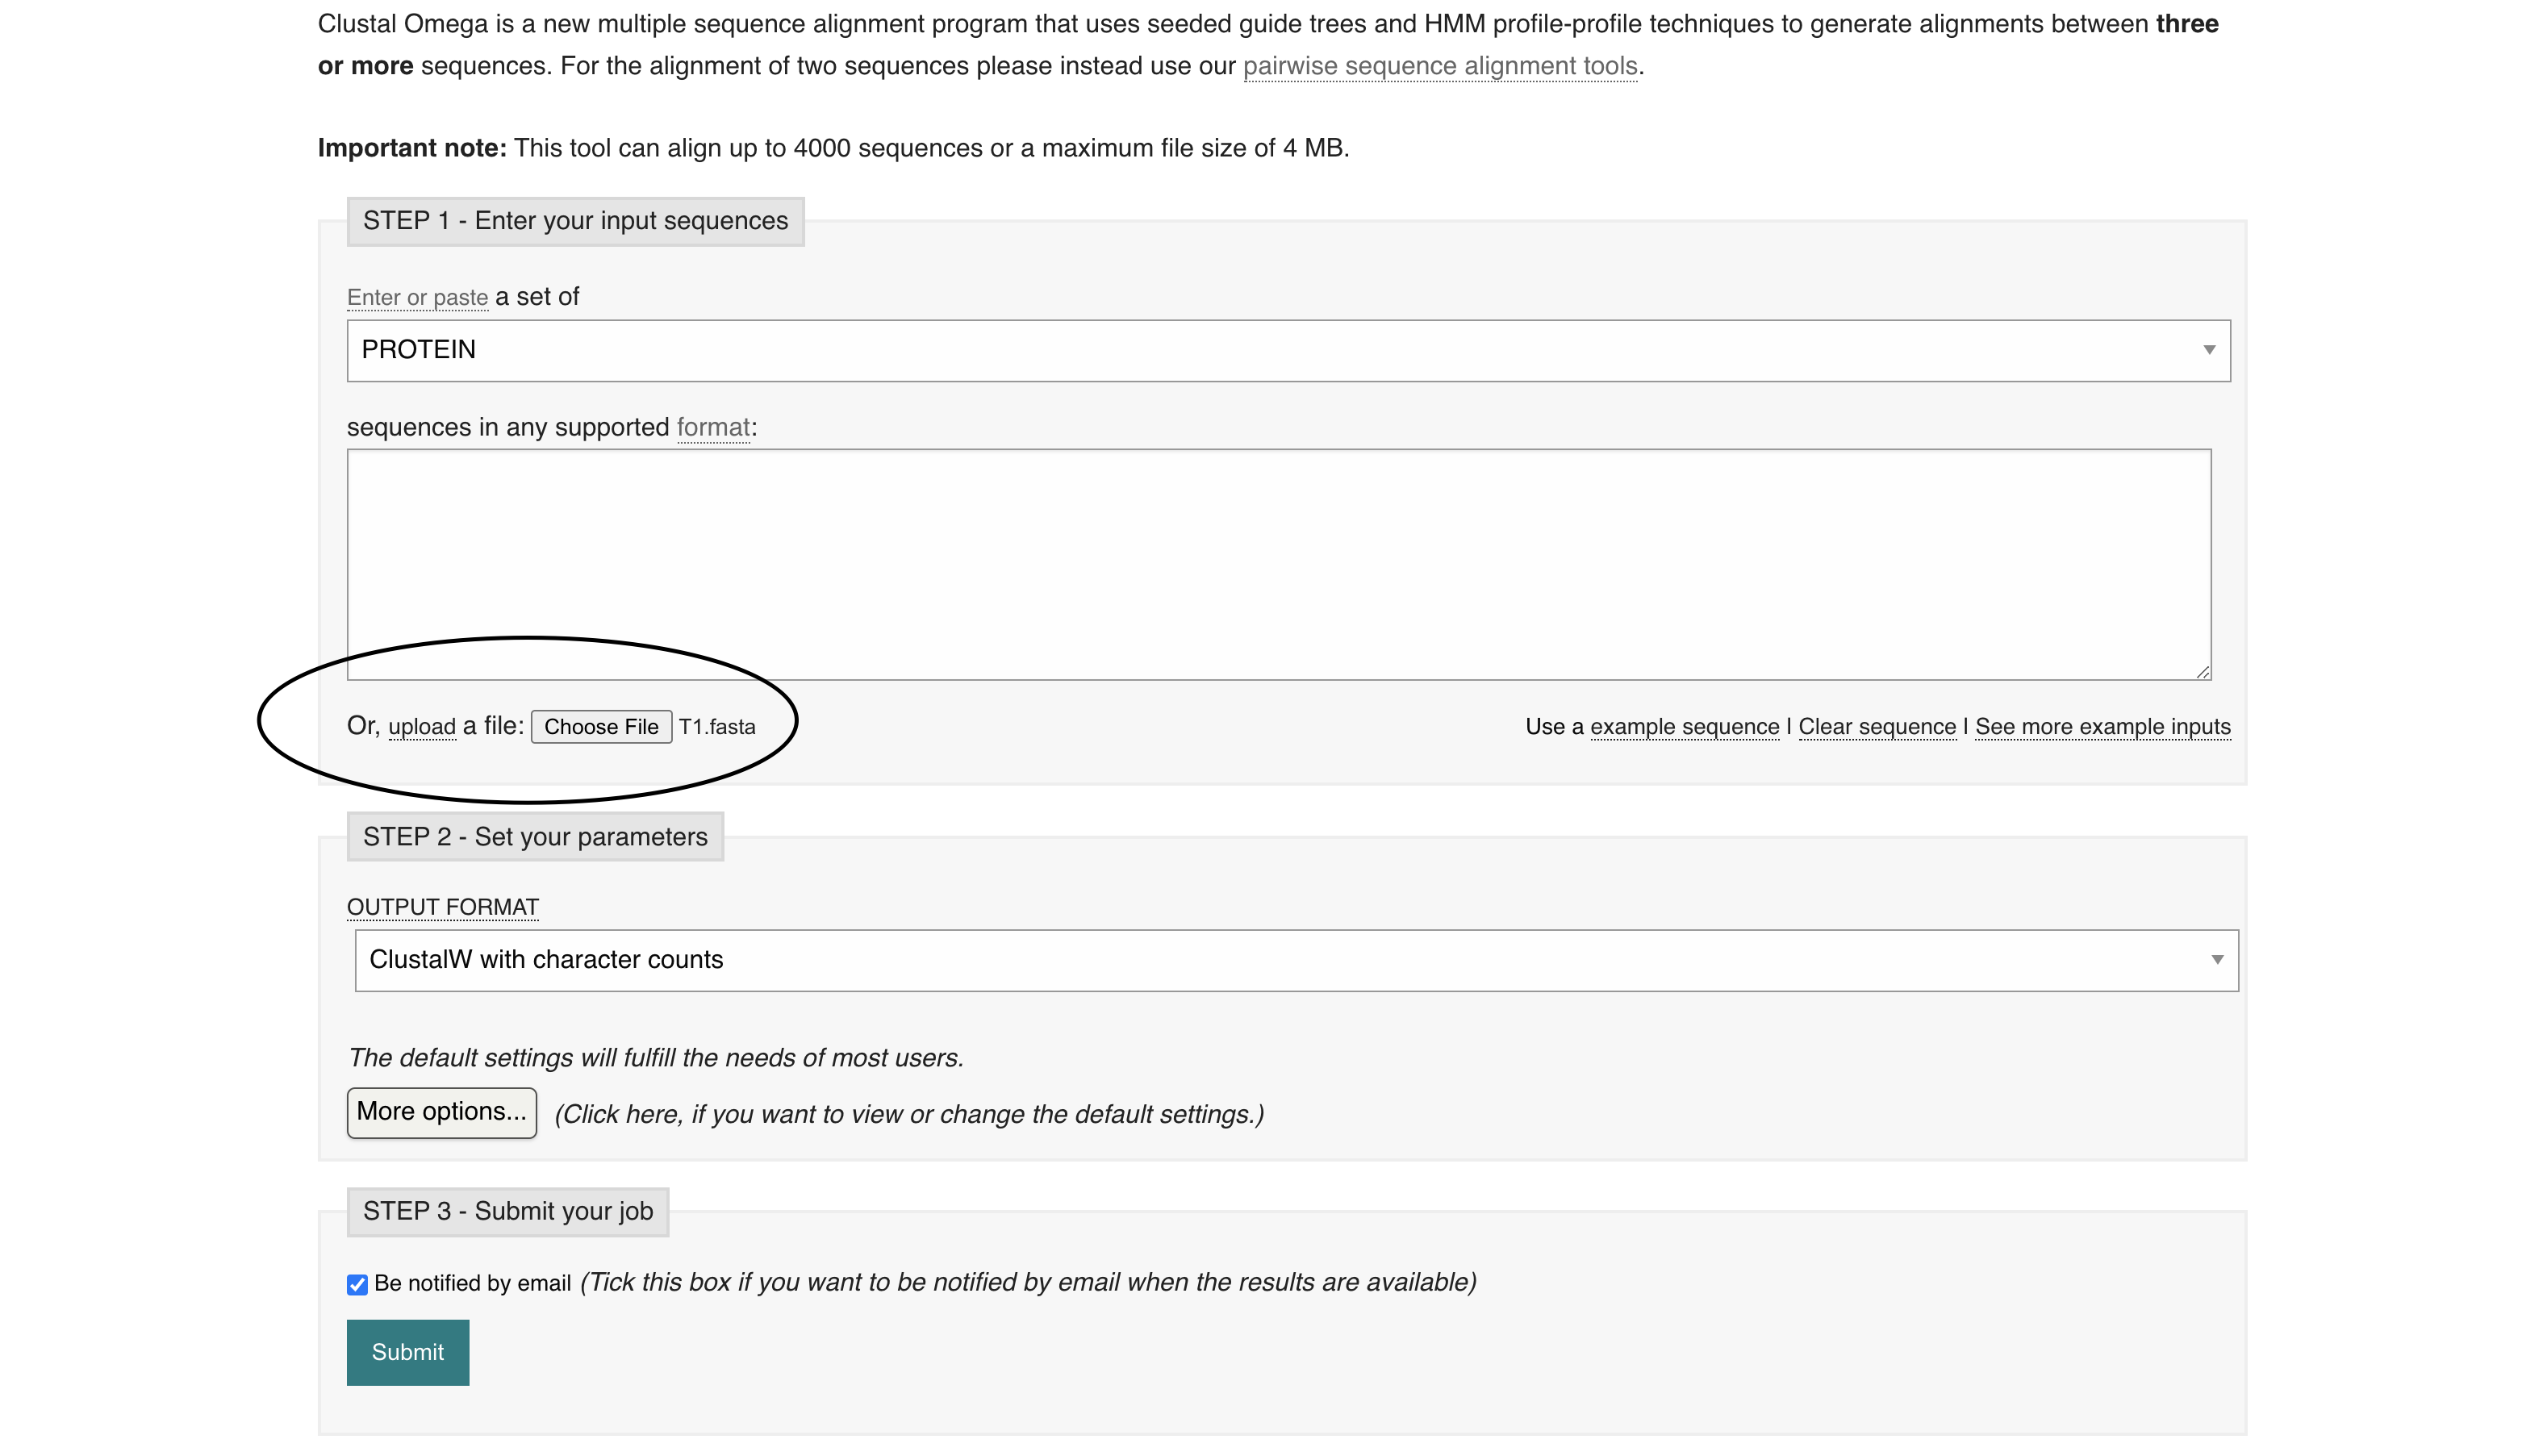

For using clustal omega directly, download the binary for your respective system at [clustal omega](http://www.clustal.org/omega/#Download)

The code below works for UNIX/MacOS Systems, mileage may vary for windows but the idea is the same

In [46]:


from Bio.Align.Applications import ClustalwCommandline
#First tell the program where to look for the input file
in_file = os.path.join(project_dir, 'data', 'ClustalW_Files', 'Fasta', 'T1.fasta')

clustalw_cline = ClustalwCommandline("clustalw2", infile = in_file)
print(clustalw_cline)
#tell the program now where the clustalo binary is located
clustalw_exe = r"../clustalo_bin/clustalo"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = in_file, newtree = "tree.dnd")

#check if the binary path actually works before trying stuff
assert os.path.isfile(clustalw_exe), "clustalw executable is missing"

#make the output go to stdout, and stderr variables
stdout, stderr = clustalw_cline()
print(clustalw_cline)



clustalw2 -infile=../../data/ClustalW_Files/Fasta/T1.fasta
../clustalo_bin/clustalo -infile=../../data/ClustalW_Files/Fasta/T1.fasta -newtree=tree.dnd


The code above will create clustal.aln and tree.dnd for the given infile


## Reading the align file

In [45]:
from Bio import AlignIO

ClustalAlign = AlignIO.read("clustal.aln", "clustal")
print(ClustalAlign)

Alignment with 5 rows and 1273 columns
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT 19A
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT 19B
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT 20A
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT 20B
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT 20C


## Reading the dnd file
Which basically gives us a phylogenetic tree, more similar sequences will be children on parent branches

In [48]:
from Bio import Phylo

tree = Phylo.read('tree.dnd', 'newick')
Phylo.draw_ascii(tree)

  _______________________________________________________________________ 20C
_|
_________________________________________________________________________ __ 20B
 |                                                                       |
____________________________________________________________________________ 20A
                                                                 |       |
                                        __________________________________ 19A
_______________________________________|                         |__________
                                       |__________________________________ 19B

